In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


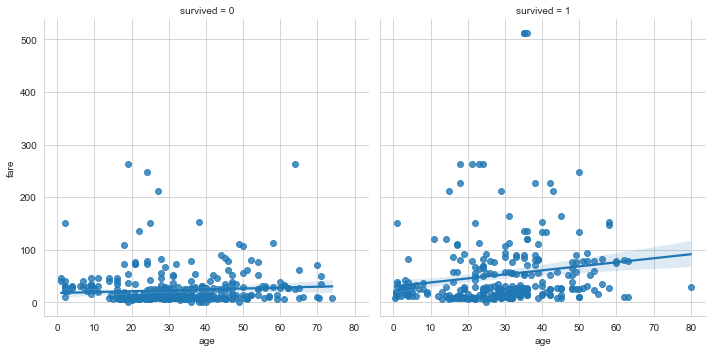

In [46]:
sns.set_style('whitegrid')
sns.lmplot(x='age', y='fare', data=titanic, col='survived')

Nhìn chung những người chết là trẻ em và ngồi ở các vị trí có giá vẻ rẻ so với nhóm người còn sống.

Biểu diễn số lượng người sống sót, chết sau sự kiên theo hạng hành khách, giới tính, nhóm tuổi

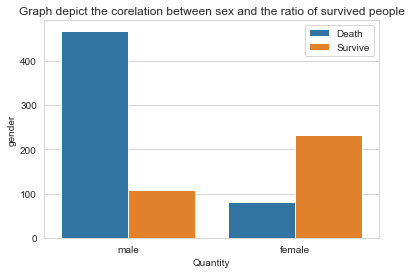

In [43]:
axes = sns.countplot(x='sex', data=titanic, hue='survived')
# Số lượng nam giới sống xót cao hơn so với phụ nữ
axes.set(title='Graph depict the corelation between sex and the ratio of survived people', ylabel='gender', xlabel='Quantity')
plt.legend(loc ='upper right', labels = ['Death', 'Survive']) 

<AxesSubplot:xlabel='survived', ylabel='count'>

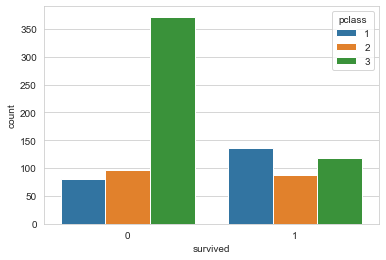

In [33]:
sns.countplot(x='survived', data=titanic, hue='pclass')
#tỷ lệ sống sót cao nhất ở hạng vé 3, thấp nhất ở hạng vé 1
#Tỷ lệ sống sót cao hơn tỷ lệ chết

<AxesSubplot:xlabel='age_group', ylabel='count'>

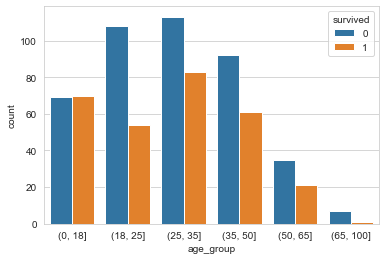

In [36]:
titanic['age_group'] = pd.cut(titanic['age'], bins=[0,18,25,35,50,65,100])
sns.countplot(x='age_group', data=titanic, hue='survived')


<AxesSubplot:xlabel='survived', ylabel='count'>

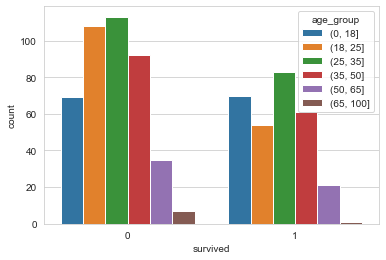

In [37]:
sns.countplot(x='survived', data=titanic, hue='age_group')
#Trong số những người sống sót, nhóm người từ (25-35) chiếm tỷ lệ cao nhất, tiếp sau là nhóm người từ 18-25

#### Dùng hàm violinplot() biểu diễn sự phân bố độ tuổi hành khách trên tàu(chia theo các nhóm sống/chết, hạng khách hàng)

<AxesSubplot:xlabel='pclass', ylabel='age'>

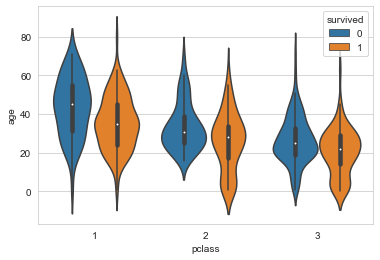

In [42]:
sns.violinplot(x = 'pclass', y='age', data=titanic, hue='survived')

hạng nhất: số ngưới sống tập trung chủ yếu ở nhóm tuổi khoảng 30 đến gần 50, sô người chết nằm trong nhóm tuổi từ khoảng 22 đến gần 45<br>
hạng 2: nhóm người sống tập trung ở nhóm tuổi gần 25 đến 40, nhóm người chết từ hơn 15 đến khoảng 30 tuổi


In [48]:
#head map bao h cũng cần array 2 chiều, 
#hàm tạo correlation giữa các thuộc tính, âm là quan hệ ngược nhau. 
cor = titanic.corr()
cor

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

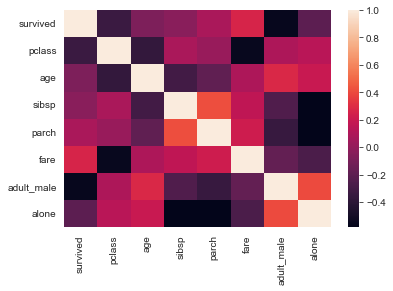

In [50]:
sns.heatmap(cor)